# Random Walks 
## Generate sequences
![Random walk](random_walk.png)

In [3]:
import numpy as np
np.random.seed(0)

In [11]:
def generate_sequence():
    walk_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
    sequence_num = [3]
    sequence_states = ['D']
    curr_pos = 3
    while curr_pos != 0 and curr_pos !=6:
        if np.random.rand() >0.5:
            curr_pos +=1
        else:
            curr_pos -=1
        sequence_num.append(curr_pos)
        sequence_states.append(walk_dict[curr_pos])
    return sequence_states,sequence_num
        
#test 
generate_sequence()

(['D', 'E', 'F', 'E', 'F', 'E', 'F', 'E', 'F', 'G'],
 [3, 4, 5, 4, 5, 4, 5, 4, 5, 6])

## TD(Lmada)

In [21]:
def x(curr_pos,n):
    xt = np.zeros(n)
    xt[curr_pos]=1
    return xt
def dw(seq,w,lm,alpha):
    n = len(w)
    et = np.zeros(n)
    dw = np.zeros(n)
    for t in range(0,len(seq)-1): #leave the last w unchanged (terminating states)
        P_t1 = np.dot(w,x(seq[t+1],n))
        P_t = np.dot(w,x(seq[t],n))
        et = x(seq[t],n) + lm*et
        dw += alpha*(P_t1-P_t)*et
    
    return dw        

In [22]:
def error_rms(w):
    w_true = np.array([0,1/6,1/3,1/2,2/3,5/6,1.0])
    return np.sqrt(np.mean((w-w_true)**2))
#test 
w = np.array([0,0.1,0.1,0.1,0.1,0.1,1.0])
error_rms(w)

0.3923878871324318

In [24]:
x(3,7)

array([0., 0., 0., 1., 0., 0., 0.])

## Test TD(Lmada)

In [29]:
seqs = [generate_sequence()[1] for i in range(100)]
for i in range(1000):
    w = np.array([0,0.2,0.2,0.2,0.2,0.2,1])
    for seq in seqs:
        w += dw(seq,w, 0.4, 0.2)
w,error_rms(w)

(array([0.        , 0.16493608, 0.32835378, 0.40707045, 0.46578697,
        0.74369881, 1.        ]),
 0.09027789788620431)

## Experiement 1

In [36]:
def experiment_1(epsilon = 1e-4):
    lms = [0,0.1,0.3,0.5,0.7,0.9,1.0]
    alphas = [0.05,0.1,0.15,0.2]
    datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros(len(lms))
    for j,lm in enumerate(lms):
        print("iteration for lamda: ",lm)
        min_error = float('inf') #to find min alpha 
        for alpha in alphas:
            print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1])
                for i in range(100):
                    for seq in dataset:
                        change =dw(seq,w,lm,alpha)
                        w += dw(seq,w,lm,alpha)
                    if np.linalg.norm(change) < epsilon:
                        break
                errors_datasets[m] = error_rms(w)
                print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            if mean_error < min_error:
                min_error = mean_error
        errors_lms[j] = min_error
    
    return errors_lms, lms
exp1_errors, exp1_lm =experiment_1()

iteration for lamda:  0
iteration for alpha:  0.05
dataset 0 started 
dataset error:  0.08403605266415015
dataset 1 started 
dataset error:  0.10116429006990935
dataset 2 started 
dataset error:  0.1704109707563136
dataset 3 started 
dataset error:  0.09643520127941534
dataset 4 started 
dataset error:  0.05526444035496948
dataset 5 started 
dataset error:  0.11709872637857488
dataset 6 started 
dataset error:  0.2026613105179314
dataset 7 started 
dataset error:  0.04829903605628306
dataset 8 started 
dataset error:  0.24270603656598802
dataset 9 started 
dataset error:  0.11355655963484684
dataset 10 started 
dataset error:  0.34379314759302754
dataset 11 started 
dataset error:  0.09427258943636062
dataset 12 started 
dataset error:  0.2510597924833289
dataset 13 started 
dataset error:  0.1713932507605071
dataset 14 started 
dataset error:  0.06666235612481623
dataset 15 started 
dataset error:  0.2712773514316075
dataset 16 started 
dataset error:  0.1099544186889377
dataset 17 st

dataset error:  0.07367268942350229
dataset 47 started 
dataset error:  0.09102804314069385
dataset 48 started 
dataset error:  0.23556093158283736
dataset 49 started 
dataset error:  0.2260371924148124
dataset 50 started 
dataset error:  0.0888885719180192
dataset 51 started 
dataset error:  0.12091663175612717
dataset 52 started 
dataset error:  0.19891143520084836
dataset 53 started 
dataset error:  0.1996582173330609
dataset 54 started 
dataset error:  0.3449536820681591
dataset 55 started 
dataset error:  0.22420916658954912
dataset 56 started 
dataset error:  0.11077136434168355
dataset 57 started 
dataset error:  0.08641546040852954
dataset 58 started 
dataset error:  0.11126635791496156
dataset 59 started 
dataset error:  0.10418953847719133
dataset 60 started 
dataset error:  0.22603878709583825
dataset 61 started 
dataset error:  0.2376574751941621
dataset 62 started 
dataset error:  0.07660681610526901
dataset 63 started 
dataset error:  0.0793805570260952
dataset 64 started

dataset error:  0.19733972381827647
dataset 95 started 
dataset error:  0.24980685296991184
dataset 96 started 
dataset error:  0.11618589725783421
dataset 97 started 
dataset error:  0.06885259302880131
dataset 98 started 
dataset error:  0.20698858213381408
dataset 99 started 
dataset error:  0.15905306342863748
iteration for alpha:  0.2
dataset 0 started 
dataset error:  0.08167598436946495
dataset 1 started 
dataset error:  0.12150477712033039
dataset 2 started 
dataset error:  0.16009227054050507
dataset 3 started 
dataset error:  0.11493932085748709
dataset 4 started 
dataset error:  0.056169065024314936
dataset 5 started 
dataset error:  35912722712613.52
dataset 6 started 
dataset error:  0.1949483879041303
dataset 7 started 
dataset error:  0.04810691909763668
dataset 8 started 
dataset error:  0.24618780857645495
dataset 9 started 
dataset error:  0.10714302171038664
dataset 10 started 
dataset error:  0.34495557652349174
dataset 11 started 
dataset error:  0.1002497759182731

dataset error:  0.10511351662197627
dataset 42 started 
dataset error:  0.15780207948903285
dataset 43 started 
dataset error:  0.13346397898451445
dataset 44 started 
dataset error:  0.16856338182124192
dataset 45 started 
dataset error:  0.2228532107411265
dataset 46 started 
dataset error:  0.06645385340233446
dataset 47 started 
dataset error:  0.08616509218113055
dataset 48 started 
dataset error:  0.23646245963682164
dataset 49 started 
dataset error:  0.22249389954920304
dataset 50 started 
dataset error:  0.08778967875649574
dataset 51 started 
dataset error:  0.1194703698496039
dataset 52 started 
dataset error:  0.19086643541097512
dataset 53 started 
dataset error:  0.1993071776617612
dataset 54 started 
dataset error:  0.3389569475672964
dataset 55 started 
dataset error:  0.21707240239815423
dataset 56 started 
dataset error:  0.0914289035185148
dataset 57 started 
dataset error:  0.08124756191258524
dataset 58 started 
dataset error:  0.11206601616859915
dataset 59 starte

dataset error:  0.2402244291765046
dataset 90 started 
dataset error:  0.21452418084180003
dataset 91 started 
dataset error:  0.2044997966691701
dataset 92 started 
dataset error:  0.034400802568777006
dataset 93 started 
dataset error:  0.09943645619559499
dataset 94 started 
dataset error:  0.20009577223279662
dataset 95 started 
dataset error:  0.25166290370857514
dataset 96 started 
dataset error:  0.09596478185868108
dataset 97 started 
dataset error:  0.06552061605234055
dataset 98 started 
dataset error:  0.20538294832851461
dataset 99 started 
dataset error:  0.1560075143957859
iteration for alpha:  0.15
dataset 0 started 
dataset error:  0.08069234471322517
dataset 1 started 
dataset error:  0.11590806271780486
dataset 2 started 
dataset error:  0.1598692897641868
dataset 3 started 
dataset error:  0.11121032442996821
dataset 4 started 
dataset error:  0.045665304137166414
dataset 5 started 
dataset error:  0.12121947561468739
dataset 6 started 
dataset error:  0.199715389161

dataset error:  0.07603367072702365
dataset 37 started 
dataset error:  0.21010451896471627
dataset 38 started 
dataset error:  0.20220869839697983
dataset 39 started 
dataset error:  0.2673556275318052
dataset 40 started 
dataset error:  0.1309304498403638
dataset 41 started 
dataset error:  0.09697301590392962
dataset 42 started 
dataset error:  0.16521789581607985
dataset 43 started 
dataset error:  0.14233782701017017
dataset 44 started 
dataset error:  0.17791564037001217
dataset 45 started 
dataset error:  0.22872212344347856
dataset 46 started 
dataset error:  0.08787835957880726
dataset 47 started 
dataset error:  0.0883141913028169
dataset 48 started 
dataset error:  0.22785973907316032
dataset 49 started 
dataset error:  0.23706932222798052
dataset 50 started 
dataset error:  0.09841576597194847
dataset 51 started 
dataset error:  0.12137277999502855
dataset 52 started 
dataset error:  0.19795983027665323
dataset 53 started 
dataset error:  0.19820959805270685
dataset 54 star

dataset error:  0.20602485917224037
dataset 84 started 
dataset error:  0.1685323238722423
dataset 85 started 
dataset error:  0.46493427029781786
dataset 86 started 
dataset error:  0.19750389228704526
dataset 87 started 
dataset error:  0.2513464265029604
dataset 88 started 
dataset error:  0.08885059878299094
dataset 89 started 
dataset error:  0.2406258159087641
dataset 90 started 
dataset error:  0.2184496618609667
dataset 91 started 
dataset error:  0.20414005841273183
dataset 92 started 
dataset error:  0.02849229462941314
dataset 93 started 
dataset error:  0.10072565818928711
dataset 94 started 
dataset error:  0.21195071556455466
dataset 95 started 
dataset error:  0.2587235001102798
dataset 96 started 
dataset error:  0.07849729981894955
dataset 97 started 
dataset error:  0.06309725063410408
dataset 98 started 
dataset error:  0.2036749076374568
dataset 99 started 
dataset error:  0.15357685725486997
iteration for alpha:  0.1
dataset 0 started 
dataset error:  0.07722451812

dataset error:  0.16517994695922122
dataset 31 started 
dataset error:  0.06420001263362962
dataset 32 started 
dataset error:  0.14105927040465194
dataset 33 started 
dataset error:  0.16868321643072876
dataset 34 started 
dataset error:  0.15509077795681295
dataset 35 started 
dataset error:  0.10098846601864898
dataset 36 started 
dataset error:  0.0847714768827291
dataset 37 started 
dataset error:  0.20181509659289945
dataset 38 started 
dataset error:  0.19565364067499033
dataset 39 started 
dataset error:  0.2772099678128736
dataset 40 started 
dataset error:  0.13097838969495823
dataset 41 started 
dataset error:  0.10405360500310094
dataset 42 started 
dataset error:  0.14420214489410146
dataset 43 started 
dataset error:  0.15493456467671604
dataset 44 started 
dataset error:  0.18381358356178565
dataset 45 started 
dataset error:  0.22985278009524526
dataset 46 started 
dataset error:  0.07734313833282837
dataset 47 started 
dataset error:  0.07753690769138241
dataset 48 sta

dataset error:  0.06257922108789532
dataset 78 started 
dataset error:  0.13076636852747034
dataset 79 started 
dataset error:  0.18587307386899765
dataset 80 started 
dataset error:  0.05545398844038568
dataset 81 started 
dataset error:  0.24616545602460133
dataset 82 started 
dataset error:  0.07064497838666531
dataset 83 started 
dataset error:  0.18843534778269197
dataset 84 started 
dataset error:  0.1691819785070974
dataset 85 started 
dataset error:  0.466799526837434
dataset 86 started 
dataset error:  0.19684093400216612
dataset 87 started 
dataset error:  0.2589986431945006
dataset 88 started 
dataset error:  0.11697069155517098
dataset 89 started 
dataset error:  0.2482879098622753
dataset 90 started 
dataset error:  0.21476855700289627
dataset 91 started 
dataset error:  0.20774594455306075
dataset 92 started 
dataset error:  0.02779584627326669
dataset 93 started 
dataset error:  0.1209676271335037
dataset 94 started 
dataset error:  0.21052508374019327
dataset 95 started

dataset error:  0.13199141395308803
dataset 26 started 
dataset error:  0.08897657921120956
dataset 27 started 
dataset error:  0.1007399190026478
dataset 28 started 
dataset error:  0.07276852353919835
dataset 29 started 
dataset error:  0.21735712390184567
dataset 30 started 
dataset error:  0.15955865615773956
dataset 31 started 
dataset error:  0.0771487465489679
dataset 32 started 
dataset error:  0.14837563351632865
dataset 33 started 
dataset error:  0.17307243651823204
dataset 34 started 
dataset error:  0.1606165396741054
dataset 35 started 
dataset error:  0.09301703386107303
dataset 36 started 
dataset error:  0.10437417059505928
dataset 37 started 
dataset error:  0.1892537101142681
dataset 38 started 
dataset error:  0.20352041993962922
dataset 39 started 
dataset error:  0.2952836584054213
dataset 40 started 
dataset error:  0.14289464830854556
dataset 41 started 
dataset error:  0.117057032296904
dataset 42 started 
dataset error:  0.12496604160444608
dataset 43 started 

dataset error:  0.2678462321227399
dataset 75 started 
dataset error:  0.0963677699567942
dataset 76 started 
dataset error:  0.08843763799783666
dataset 77 started 
dataset error:  0.061452025912966675
dataset 78 started 
dataset error:  0.14154840365315594
dataset 79 started 
dataset error:  0.17936330603341355
dataset 80 started 
dataset error:  0.04134929221301412
dataset 81 started 
dataset error:  0.23953604289863947
dataset 82 started 
dataset error:  0.0898767056012049
dataset 83 started 
dataset error:  0.20768226202438575
dataset 84 started 
dataset error:  0.1835117635281865
dataset 85 started 
dataset error:  0.46670931563803825
dataset 86 started 
dataset error:  0.19076144400738876
dataset 87 started 
dataset error:  0.25785778266223824
dataset 88 started 
dataset error:  0.10066142213900572
dataset 89 started 
dataset error:  0.2539985573574758
dataset 90 started 
dataset error:  0.21480408411837804
dataset 91 started 
dataset error:  0.20734075839751667
dataset 92 start

dataset error:  0.1042491270716415
dataset 21 started 
dataset error:  0.2627404167419383
dataset 22 started 
dataset error:  0.1636672734675851
dataset 23 started 
dataset error:  0.18807751378395673
dataset 24 started 
dataset error:  0.1499463489706012
dataset 25 started 
dataset error:  0.12158269852694066
dataset 26 started 
dataset error:  0.11349962351099592
dataset 27 started 
dataset error:  0.1007665011637368
dataset 28 started 
dataset error:  0.06989276858956894
dataset 29 started 
dataset error:  0.2278497436590364
dataset 30 started 
dataset error:  0.15612288540558297
dataset 31 started 
dataset error:  0.0892785007636441
dataset 32 started 
dataset error:  0.15863823147785389
dataset 33 started 
dataset error:  0.1820522281967188
dataset 34 started 
dataset error:  0.16615934199649013
dataset 35 started 
dataset error:  0.09786889359349023
dataset 36 started 
dataset error:  0.13283871499012342
dataset 37 started 
dataset error:  0.17043099943578466
dataset 38 started 


dataset error:  0.08137922969044803
dataset 68 started 
dataset error:  0.3034883418491779
dataset 69 started 
dataset error:  0.047172423590479656
dataset 70 started 
dataset error:  0.07791196218494408
dataset 71 started 
dataset error:  0.36627842056420795
dataset 72 started 
dataset error:  0.10799894788112427
dataset 73 started 
dataset error:  0.16871764130818767
dataset 74 started 
dataset error:  0.25823005561844303
dataset 75 started 
dataset error:  0.10424206926796913
dataset 76 started 
dataset error:  0.07396410337967856
dataset 77 started 
dataset error:  0.06483817961206295
dataset 78 started 
dataset error:  0.1633664403214665
dataset 79 started 
dataset error:  0.15460952126082492
dataset 80 started 
dataset error:  0.050016315829434
dataset 81 started 
dataset error:  0.22964636085277604
dataset 82 started 
dataset error:  0.13139734363098848
dataset 83 started 
dataset error:  0.2251222675438068
dataset 84 started 
dataset error:  0.2000375572384943
dataset 85 starte

dataset error:  0.22717672142497095
dataset 16 started 
dataset error:  0.10161997184407186
dataset 17 started 
dataset error:  0.23225914958060065
dataset 18 started 
dataset error:  0.46660371341145385
dataset 19 started 
dataset error:  0.1683258176240439
dataset 20 started 
dataset error:  0.14055507191762096
dataset 21 started 
dataset error:  0.23620651141117935
dataset 22 started 
dataset error:  0.17799285714040247
dataset 23 started 
dataset error:  0.1739532136065477
dataset 24 started 
dataset error:  0.11762771330569534
dataset 25 started 
dataset error:  0.17132780652903223
dataset 26 started 
dataset error:  0.1116654844386338
dataset 27 started 
dataset error:  0.10434012311947584
dataset 28 started 
dataset error:  0.09430190605747672
dataset 29 started 
dataset error:  0.21310959815100203
dataset 30 started 
dataset error:  0.18716262205705872
dataset 31 started 
dataset error:  0.0950267977884971
dataset 32 started 
dataset error:  0.15046141465431184
dataset 33 start

dataset error:  0.10443804651179127
dataset 65 started 
dataset error:  0.23601901462091662
dataset 66 started 
dataset error:  0.21887017138407378
dataset 67 started 
dataset error:  0.13307845387418038
dataset 68 started 
dataset error:  0.36403598938408255
dataset 69 started 
dataset error:  0.06644335113461075
dataset 70 started 
dataset error:  0.1267600432240379
dataset 71 started 
dataset error:  0.41372003941466595
dataset 72 started 
dataset error:  0.16389827339309118
dataset 73 started 
dataset error:  0.1716814843567587
dataset 74 started 
dataset error:  0.23935073519442207
dataset 75 started 
dataset error:  0.09383095034597463
dataset 76 started 
dataset error:  0.07272173400572998
dataset 77 started 
dataset error:  0.0620141922478499
dataset 78 started 
dataset error:  0.1965814643879489
dataset 79 started 
dataset error:  0.15650638391770924
dataset 80 started 
dataset error:  0.13613588744636015
dataset 81 started 
dataset error:  0.17826352622954067
dataset 82 start

dataset error:  0.20485713624804117
dataset 13 started 
dataset error:  0.20905862248894932
dataset 14 started 
dataset error:  0.11235423796678026
dataset 15 started 
dataset error:  0.18895889415528755
dataset 16 started 
dataset error:  0.1036092884093261
dataset 17 started 
dataset error:  0.1390849135192694
dataset 18 started 
dataset error:  0.46516370215892894
dataset 19 started 
dataset error:  0.17405448128598905
dataset 20 started 
dataset error:  0.19509570300238224
dataset 21 started 
dataset error:  0.26594425098819724
dataset 22 started 
dataset error:  0.20725924233719953
dataset 23 started 
dataset error:  0.15436517870575797
dataset 24 started 
dataset error:  0.15691643993391954
dataset 25 started 
dataset error:  0.1654607069945734
dataset 26 started 
dataset error:  0.17013618142076806
dataset 27 started 
dataset error:  0.04910987066612133
dataset 28 started 
dataset error:  0.13030703731071194
dataset 29 started 
dataset error:  0.22390805425142704
dataset 30 star

dataset error:  0.3202527700646998
dataset 61 started 
dataset error:  0.23687585551572996
dataset 62 started 
dataset error:  0.2280086968729827
dataset 63 started 
dataset error:  0.20721690241533636
dataset 64 started 
dataset error:  0.24406181120020493
dataset 65 started 
dataset error:  0.264479165510826
dataset 66 started 
dataset error:  0.23508009752395473
dataset 67 started 
dataset error:  0.09053683888012388
dataset 68 started 
dataset error:  0.41340954790809703
dataset 69 started 
dataset error:  0.12022932597929425
dataset 70 started 
dataset error:  0.10325953172267864
dataset 71 started 
dataset error:  0.4428850872143933
dataset 72 started 
dataset error:  0.22206111662551756
dataset 73 started 
dataset error:  0.19427538369536007
dataset 74 started 
dataset error:  0.2944817583257039
dataset 75 started 
dataset error:  0.07793910365080134
dataset 76 started 
dataset error:  0.12389682995784645
dataset 77 started 
dataset error:  0.12227630601481057
dataset 78 started

dataset error:  0.2507508136685891
dataset 9 started 
dataset error:  0.13085658812514186
dataset 10 started 
dataset error:  0.34505199825191185
dataset 11 started 
dataset error:  0.14721035962917609
dataset 12 started 
dataset error:  0.1653828488762659
dataset 13 started 
dataset error:  0.215989249112777
dataset 14 started 
dataset error:  0.18506637492071343
dataset 15 started 
dataset error:  0.2109626548896868
dataset 16 started 
dataset error:  0.12026812638520983
dataset 17 started 
dataset error:  0.1782876660125685
dataset 18 started 
dataset error:  0.4275080105184981
dataset 19 started 
dataset error:  0.17344329409707407
dataset 20 started 
dataset error:  0.3384101650897609
dataset 21 started 
dataset error:  0.2878054698639732
dataset 22 started 
dataset error:  0.21795620313294312
dataset 23 started 
dataset error:  0.17377054755703916
dataset 24 started 
dataset error:  0.18575367899439688
dataset 25 started 
dataset error:  0.12293963374484834
dataset 26 started 
da

dataset error:  0.30875207337201815
dataset 58 started 
dataset error:  0.2175546026486418
dataset 59 started 
dataset error:  0.37224662558455573
dataset 60 started 
dataset error:  0.33656470306006453
dataset 61 started 
dataset error:  0.26145401424560166
dataset 62 started 
dataset error:  0.256644886802974
dataset 63 started 
dataset error:  0.29510762402363533
dataset 64 started 
dataset error:  0.4946059118395904
dataset 65 started 
dataset error:  0.2781962683208452
dataset 66 started 
dataset error:  0.2429187716322901
dataset 67 started 
dataset error:  0.2089638877411193
dataset 68 started 
dataset error:  0.4651282584686374
dataset 69 started 
dataset error:  0.2843652617304376
dataset 70 started 
dataset error:  0.1346005275311999
dataset 71 started 
dataset error:  0.4549984722548965
dataset 72 started 
dataset error:  0.28994691195566274
dataset 73 started 
dataset error:  0.1974579962539767
dataset 74 started 
dataset error:  0.3470515547195424
dataset 75 started 
datas

array([0.15546862, 0.1557709 , 0.15731898, 0.16078645, 0.16773988,
       0.18536453, 0.21426004])

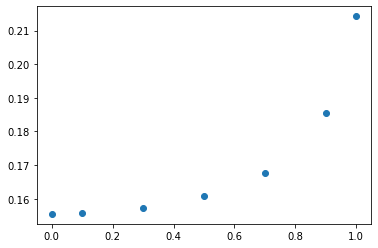

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(np.array([0,0.1,0.3,0.5,0.7,0.9,1.0]),np.array([0.15546862, 0.1557709 , 0.15731898, 0.16078645, 0.16773988,
       0.18536453, 0.21426004]))

In [43]:
def experiment_2(epsilon = 1e-3):
    lms = [0,0.3,0.8,1.0]
    alphas = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
    datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros((len(lms),len(alphas)))
    for j,lm in enumerate(lms):
        print("iteration for lamda: ",lm)
        for n,alpha in enumerate(alphas):
            print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1])
                for i in range(50):
                    for seq in dataset:
                        change =dw(seq,w,lm,alpha)
                        w += dw(seq,w,lm,alpha)
                    if np.linalg.norm(change) < epsilon:
                        break
                errors_datasets[m] = error_rms(w)
                print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            errors_lms[j,n] = mean_error
    
    return errors_lms, alphas
exp2_errors, exp2_alpha =experiment_2()

iteration for lamda:  0
iteration for alpha:  0.05
dataset 0 started 
dataset error:  0.2061919748752137
dataset 1 started 
dataset error:  0.1812310178042018
dataset 2 started 
dataset error:  0.11115228947568757
dataset 3 started 
dataset error:  0.09881937549519901
dataset 4 started 
dataset error:  0.20556196347866643
dataset 5 started 
dataset error:  0.19255746302504925
dataset 6 started 
dataset error:  0.10069014534429523
dataset 7 started 
dataset error:  0.11388100285067349
dataset 8 started 
dataset error:  0.08203216186093373
dataset 9 started 
dataset error:  0.38655372262669413
dataset 10 started 
dataset error:  0.06826359748411666
dataset 11 started 
dataset error:  0.10133310891747846
dataset 12 started 
dataset error:  0.20711293828752048
dataset 13 started 
dataset error:  0.07981094671227607
dataset 14 started 
dataset error:  0.06468901885204029
dataset 15 started 
dataset error:  0.21236671351619957
dataset 16 started 
dataset error:  0.08997574891667019
dataset 1

dataset error:  0.25837153610865665
dataset 49 started 
dataset error:  0.1085989245208963
dataset 50 started 
dataset error:  0.2121959037028051
dataset 51 started 
dataset error:  0.05575819991886271
dataset 52 started 
dataset error:  0.07876122233101845
dataset 53 started 
dataset error:  0.07784976255730533
dataset 54 started 
dataset error:  0.23848550107543467
dataset 55 started 
dataset error:  0.07976022255516833
dataset 56 started 
dataset error:  0.2407549931573608
dataset 57 started 
dataset error:  0.11378773755580485
dataset 58 started 
dataset error:  0.10719739889918102
dataset 59 started 
dataset error:  0.0807279480770661
dataset 60 started 
dataset error:  0.09623237055133016
dataset 61 started 
dataset error:  0.2711388489314452
dataset 62 started 
dataset error:  0.10002589292196137
dataset 63 started 
dataset error:  0.2026499172591615
dataset 64 started 
dataset error:  0.2160210288017846
dataset 65 started 
dataset error:  0.07519395940240622
dataset 66 started 

dataset error:  0.2152112745483929
dataset 96 started 
dataset error:  0.21261073779528883
dataset 97 started 
dataset error:  0.11230855044985469
dataset 98 started 
dataset error:  0.23249061824102488
dataset 99 started 
dataset error:  0.1145072526403564
iteration for alpha:  0.2
dataset 0 started 
dataset error:  0.2058677263850609
dataset 1 started 
dataset error:  0.18317288575314095
dataset 2 started 
dataset error:  0.11433282863092636
dataset 3 started 
dataset error:  0.09096995472555089
dataset 4 started 
dataset error:  0.2410263155211061
dataset 5 started 
dataset error:  0.1928796668480209
dataset 6 started 
dataset error:  0.10278218104437474
dataset 7 started 
dataset error:  0.11473613353629573
dataset 8 started 
dataset error:  0.06730269213301966
dataset 9 started 
dataset error:  0.4614769634568662
dataset 10 started 
dataset error:  0.07096737296633149
dataset 11 started 
dataset error:  0.09786407799363471
dataset 12 started 
dataset error:  0.2269802043436258
dat

dataset error:  0.2505652611306701
dataset 45 started 
dataset error:  0.19358834480717108
dataset 46 started 
dataset error:  0.46534029682232886
dataset 47 started 
dataset error:  0.07800715322530764
dataset 48 started 
dataset error:  0.24663447419224246
dataset 49 started 
dataset error:  0.10851515291142214
dataset 50 started 
dataset error:  0.22497534123127147
dataset 51 started 
dataset error:  0.06664856845354164
dataset 52 started 
dataset error:  0.10145797884035153
dataset 53 started 
dataset error:  0.09661442158760462
dataset 54 started 
dataset error:  0.23777433360642286
dataset 55 started 
dataset error:  0.07270277280548386
dataset 56 started 
dataset error:  0.2518245777463554
dataset 57 started 
dataset error:  0.11289679817052523
dataset 58 started 
dataset error:  0.1141325507442745
dataset 59 started 
dataset error:  0.0952618729927644
dataset 60 started 
dataset error:  0.08888056066959839
dataset 61 started 
dataset error:  0.24240066095031007
dataset 62 start

dataset error:  0.08347617427004621
dataset 93 started 
dataset error:  0.23424010539908488
dataset 94 started 
dataset error:  0.27257435022176973
dataset 95 started 
dataset error:  0.23244236861380643
dataset 96 started 
dataset error:  0.22579961933075846
dataset 97 started 
dataset error:  0.1266447631123522
dataset 98 started 
dataset error:  0.27067894157847516
dataset 99 started 
dataset error:  0.16162642971883334
iteration for alpha:  0.35
dataset 0 started 
dataset error:  0.20010585038898904
dataset 1 started 
dataset error:  0.17991968662797114
dataset 2 started 
dataset error:  0.12819126831240113
dataset 3 started 
dataset error:  0.09773270570213004
dataset 4 started 
dataset error:  297135481164340.4
dataset 5 started 
dataset error:  0.20056726684428422
dataset 6 started 
dataset error:  0.11257137528607221
dataset 7 started 
dataset error:  1854560.1038556285
dataset 8 started 
dataset error:  2457199970758488.0
dataset 9 started 
dataset error:  0.46479988267325856


dataset error:  7.222446296036874e+49
dataset 41 started 
dataset error:  230041894.5419759
dataset 42 started 
dataset error:  0.1488216323647358
dataset 43 started 
dataset error:  481680.0324785094
dataset 44 started 
dataset error:  2.1495206743905926e+31
dataset 45 started 
dataset error:  0.19962271585511462
dataset 46 started 
dataset error:  0.46654776056085784
dataset 47 started 
dataset error:  0.08782870263665696
dataset 48 started 
dataset error:  8.168729091539326e+22
dataset 49 started 
dataset error:  0.15581787934823274
dataset 50 started 
dataset error:  0.2472966719288939
dataset 51 started 
dataset error:  2348754.3008745476
dataset 52 started 
dataset error:  43306.42895242768
dataset 53 started 
dataset error:  0.09807510913880617
dataset 54 started 
dataset error:  517494.3606021557
dataset 55 started 
dataset error:  103.26026133095891
dataset 56 started 
dataset error:  0.29031015394253457
dataset 57 started 
dataset error:  0.1250470070360888
dataset 58 started

dataset error:  0.12299328666479202
dataset 87 started 
dataset error:  6.246294781362423e+27
dataset 88 started 
dataset error:  4.7077067288073474e+27
dataset 89 started 
dataset error:  0.26788326265323925
dataset 90 started 
dataset error:  0.11893806362315877
dataset 91 started 
dataset error:  0.2210747591146416
dataset 92 started 
dataset error:  0.28073399560889195
dataset 93 started 
dataset error:  0.26885662535602955
dataset 94 started 
dataset error:  0.3211087627203265
dataset 95 started 
dataset error:  0.2607656263131437
dataset 96 started 
dataset error:  6.1177181689471715e+29
dataset 97 started 
dataset error:  0.22731097121451488
dataset 98 started 
dataset error:  6.086653124943581e+23
dataset 99 started 
dataset error:  4640499054.914248
iteration for alpha:  0.5
dataset 0 started 
dataset error:  0.20820821955818422
dataset 1 started 
dataset error:  0.17900718088957135
dataset 2 started 
dataset error:  3.343294243836223e+22
dataset 3 started 
dataset error:  352

dataset error:  4.1373684159938954e+49
dataset 32 started 
dataset error:  2.983950049061504e+71
dataset 33 started 
dataset error:  1.0221130453012139e+71
dataset 34 started 
dataset error:  0.18921570033057003
dataset 35 started 
dataset error:  2.9127917737715656e+18
dataset 36 started 
dataset error:  0.811682459600637
dataset 37 started 
dataset error:  0.24344389237536607
dataset 38 started 
dataset error:  1.2217628588163945e+83
dataset 39 started 
dataset error:  7.579939336907103e+30
dataset 40 started 
dataset error:  5.106915628478217e+77
dataset 41 started 
dataset error:  3.643442475073339e+18
dataset 42 started 
dataset error:  0.07241134030030873
dataset 43 started 
dataset error:  5.242487800781005e+69
dataset 44 started 
dataset error:  2.333570015794944e+25
dataset 45 started 
dataset error:  0.2142522285167617
dataset 46 started 
dataset error:  0.46694476015885195
dataset 47 started 
dataset error:  7.502884243435199e+23
dataset 48 started 
dataset error:  9.3302385

dataset error:  7.645492630681103e+37
dataset 78 started 
dataset error:  0.3957134780762513
dataset 79 started 
dataset error:  20582.712139124513
dataset 80 started 
dataset error:  1.2793504711129733e+124
dataset 81 started 
dataset error:  2.3831108305720043
dataset 82 started 
dataset error:  0.18692304073259686
dataset 83 started 
dataset error:  0.991560897820112
dataset 84 started 
dataset error:  1.7874104872308626e+56
dataset 85 started 
dataset error:  0.11695890089546772
dataset 86 started 
dataset error:  2.679101761165722e+24
dataset 87 started 
dataset error:  3.3986315705714575e+50
dataset 88 started 
dataset error:  6.424354420521228e+52
dataset 89 started 
dataset error:  0.20380015770573845
dataset 90 started 
dataset error:  0.14198358177177567
dataset 91 started 
dataset error:  2804840852845.89
dataset 92 started 
dataset error:  3.987438819140889e+36
dataset 93 started 
dataset error:  65598288.23490439
dataset 94 started 
dataset error:  0.6219813412377865
datas

dataset error:  0.07112074138288155
dataset 24 started 
dataset error:  0.27490922931939743
dataset 25 started 
dataset error:  0.06814306263792178
dataset 26 started 
dataset error:  0.08243074641356195
dataset 27 started 
dataset error:  0.057693651717082926
dataset 28 started 
dataset error:  0.15973966574671242
dataset 29 started 
dataset error:  0.14554873599558524
dataset 30 started 
dataset error:  0.09209024307636691
dataset 31 started 
dataset error:  0.15656986853364413
dataset 32 started 
dataset error:  0.11667420812633253
dataset 33 started 
dataset error:  0.4641129052581395
dataset 34 started 
dataset error:  0.11434965166543364
dataset 35 started 
dataset error:  0.2531867282838508
dataset 36 started 
dataset error:  0.21271131339020802
dataset 37 started 
dataset error:  0.07777353366468248
dataset 38 started 
dataset error:  0.2801635799404568
dataset 39 started 
dataset error:  0.06336806959558927
dataset 40 started 
dataset error:  0.23907539535659725
dataset 41 sta

dataset error:  0.05133079976609974
dataset 75 started 
dataset error:  0.2555122292205137
dataset 76 started 
dataset error:  0.10585029973757261
dataset 77 started 
dataset error:  0.24341515421910914
dataset 78 started 
dataset error:  0.1904947133578058
dataset 79 started 
dataset error:  0.17948913683913656
dataset 80 started 
dataset error:  0.12491266605393461
dataset 81 started 
dataset error:  0.2142822329951335
dataset 82 started 
dataset error:  0.037140670428592926
dataset 83 started 
dataset error:  0.11234480219519137
dataset 84 started 
dataset error:  0.11290153978200757
dataset 85 started 
dataset error:  0.08577829466954491
dataset 86 started 
dataset error:  0.1523957949709964
dataset 87 started 
dataset error:  0.12509260268548586
dataset 88 started 
dataset error:  0.21714614994325804
dataset 89 started 
dataset error:  0.1648918954822446
dataset 90 started 
dataset error:  0.09588322972390873
dataset 91 started 
dataset error:  0.22174447339260261
dataset 92 start

dataset error:  0.2963839470386598
dataset 25 started 
dataset error:  0.0899591063664384
dataset 26 started 
dataset error:  0.0784759551534828
dataset 27 started 
dataset error:  0.05715011098939668
dataset 28 started 
dataset error:  0.1746110178418078
dataset 29 started 
dataset error:  0.15032344840553669
dataset 30 started 
dataset error:  0.09411669857607717
dataset 31 started 
dataset error:  0.14911970514533113
dataset 32 started 
dataset error:  0.09427908139656889
dataset 33 started 
dataset error:  0.4663097651654873
dataset 34 started 
dataset error:  0.11720991705373145
dataset 35 started 
dataset error:  0.24568818608980705
dataset 36 started 
dataset error:  0.23984381316727954
dataset 37 started 
dataset error:  0.08086830538078041
dataset 38 started 
dataset error:  0.2942450196968328
dataset 39 started 
dataset error:  0.07643681316667268
dataset 40 started 
dataset error:  0.24277917471689672
dataset 41 started 
dataset error:  0.4617084864662552
dataset 42 started 

dataset error:  0.35539432282310596
dataset 76 started 
dataset error:  0.14686093105449902
dataset 77 started 
dataset error:  0.2962443933389756
dataset 78 started 
dataset error:  0.20773745321951925
dataset 79 started 
dataset error:  0.18692036630058523
dataset 80 started 
dataset error:  0.157029683512771
dataset 81 started 
dataset error:  0.23170689521913254
dataset 82 started 
dataset error:  0.06748557755770826
dataset 83 started 
dataset error:  0.10865328429196879
dataset 84 started 
dataset error:  0.0964310651290716
dataset 85 started 
dataset error:  0.08245548938184467
dataset 86 started 
dataset error:  0.13584811462351004
dataset 87 started 
dataset error:  0.2921849521335703
dataset 88 started 
dataset error:  0.23308452247592398
dataset 89 started 
dataset error:  0.18496287509015039
dataset 90 started 
dataset error:  0.11082768758175271
dataset 91 started 
dataset error:  0.22185042310211894
dataset 92 started 
dataset error:  0.08490106314289854
dataset 93 starte

dataset error:  6901473.131825489
dataset 26 started 
dataset error:  0.08100660106528988
dataset 27 started 
dataset error:  0.06828110218997725
dataset 28 started 
dataset error:  0.19711930256650007
dataset 29 started 
dataset error:  0.16286101457012095
dataset 30 started 
dataset error:  0.10363237316272177
dataset 31 started 
dataset error:  0.14281533662831816
dataset 32 started 
dataset error:  2.91459863974359e+35
dataset 33 started 
dataset error:  0.4668081658351454
dataset 34 started 
dataset error:  0.13134239829178704
dataset 35 started 
dataset error:  0.23922045231013656
dataset 36 started 
dataset error:  0.28499910957353436
dataset 37 started 
dataset error:  0.10019736106092823
dataset 38 started 
dataset error:  2.1169127622291216e+22
dataset 39 started 
dataset error:  0.09687215592242024
dataset 40 started 
dataset error:  467494174570796.94
dataset 41 started 
dataset error:  0.4634458324564295
dataset 42 started 
dataset error:  12.625927967043626
dataset 43 sta

dataset error:  2.2455707059045868e+16
dataset 76 started 
dataset error:  0.3478208504487102
dataset 77 started 
dataset error:  119619303025.47168
dataset 78 started 
dataset error:  0.2104618038694952
dataset 79 started 
dataset error:  0.20178964132039304
dataset 80 started 
dataset error:  14277510.8645003
dataset 81 started 
dataset error:  0.24123469091271518
dataset 82 started 
dataset error:  0.1316375903824476
dataset 83 started 
dataset error:  0.10246267848234675
dataset 84 started 
dataset error:  0.0797693560361235
dataset 85 started 
dataset error:  0.08587288061929216
dataset 86 started 
dataset error:  0.12825076184535783
dataset 87 started 
dataset error:  5205236062147.797
dataset 88 started 
dataset error:  1.114462687903619
dataset 89 started 
dataset error:  0.2061761025839893
dataset 90 started 
dataset error:  0.13266492340034208
dataset 91 started 
dataset error:  0.21813555526293316
dataset 92 started 
dataset error:  0.12232050460485218
dataset 93 started 
da

dataset error:  12711793287839.564
dataset 26 started 
dataset error:  0.10592419273167407
dataset 27 started 
dataset error:  0.11300961207672282
dataset 28 started 
dataset error:  0.24534816063947631
dataset 29 started 
dataset error:  0.1848362647125411
dataset 30 started 
dataset error:  0.13614524145529858
dataset 31 started 
dataset error:  9.126660019840321e+18
dataset 32 started 
dataset error:  1.0224598628291244e+53
dataset 33 started 
dataset error:  6.89543358383126e+37
dataset 34 started 
dataset error:  0.1612989270534484
dataset 35 started 
dataset error:  0.21352259196907353
dataset 36 started 
dataset error:  0.8564398100575255
dataset 37 started 
dataset error:  0.13096879729278743
dataset 38 started 
dataset error:  5.241678141270666e+59
dataset 39 started 
dataset error:  0.1083331768759547
dataset 40 started 
dataset error:  4.115290068666522e+58
dataset 41 started 
dataset error:  77045069214.34732
dataset 42 started 
dataset error:  0.10301776585331006
dataset 4

dataset error:  1986164646789.919
dataset 74 started 
dataset error:  0.2265811305432498
dataset 75 started 
dataset error:  1.872894725767948e+20
dataset 76 started 
dataset error:  1.0555008149151387e+65
dataset 77 started 
dataset error:  3.224366610516528e+27
dataset 78 started 
dataset error:  0.21834197896584404
dataset 79 started 
dataset error:  0.2280345375670955
dataset 80 started 
dataset error:  8.362443098305672e+87
dataset 81 started 
dataset error:  0.2408432630448184
dataset 82 started 
dataset error:  0.2106885203512298
dataset 83 started 
dataset error:  0.09850808773208945
dataset 84 started 
dataset error:  1.984728391798627e+21
dataset 85 started 
dataset error:  0.0977715538285678
dataset 86 started 
dataset error:  0.15199454281650585
dataset 87 started 
dataset error:  6.682153604535859e+38
dataset 88 started 
dataset error:  9.563049169919923e+29
dataset 89 started 
dataset error:  0.19919004134255736
dataset 90 started 
dataset error:  0.16109138244136614
data

dataset error:  0.12831961417985252
dataset 24 started 
dataset error:  0.3101399374430697
dataset 25 started 
dataset error:  0.1244514912676218
dataset 26 started 
dataset error:  0.12446725774547392
dataset 27 started 
dataset error:  0.05203684646263141
dataset 28 started 
dataset error:  0.16105062457523014
dataset 29 started 
dataset error:  0.15542618922993448
dataset 30 started 
dataset error:  0.14287114014044647
dataset 31 started 
dataset error:  0.2269061579669093
dataset 32 started 
dataset error:  0.09809136471414626
dataset 33 started 
dataset error:  0.46585132935238854
dataset 34 started 
dataset error:  0.15109876292341384
dataset 35 started 
dataset error:  0.3232560532237064
dataset 36 started 
dataset error:  0.2548057162864694
dataset 37 started 
dataset error:  0.0646031129027005
dataset 38 started 
dataset error:  0.2918222633168003
dataset 39 started 
dataset error:  0.09950431725092747
dataset 40 started 
dataset error:  0.23010823584267562
dataset 41 started 

dataset error:  0.08922865832336485
dataset 74 started 
dataset error:  0.10779656736433045
dataset 75 started 
dataset error:  0.19136778450832448
dataset 76 started 
dataset error:  0.13375754360571976
dataset 77 started 
dataset error:  0.1838795467043962
dataset 78 started 
dataset error:  0.23282022110144987
dataset 79 started 
dataset error:  0.20621971513512696
dataset 80 started 
dataset error:  0.14230323531853348
dataset 81 started 
dataset error:  0.14301581063323585
dataset 82 started 
dataset error:  0.08416779181577598
dataset 83 started 
dataset error:  0.15770448766247533
dataset 84 started 
dataset error:  0.09917435086328506
dataset 85 started 
dataset error:  0.08925143580940607
dataset 86 started 
dataset error:  0.22122374085125526
dataset 87 started 
dataset error:  0.07425550013329778
dataset 88 started 
dataset error:  0.22924379733044573
dataset 89 started 
dataset error:  0.2576891038787444
dataset 90 started 
dataset error:  0.15154782624321037
dataset 91 sta

dataset error:  0.1766934803962762
dataset 26 started 
dataset error:  0.1361797654175612
dataset 27 started 
dataset error:  0.08957759773307848
dataset 28 started 
dataset error:  0.184787799197312
dataset 29 started 
dataset error:  0.16489670593700684
dataset 30 started 
dataset error:  0.1283812587036475
dataset 31 started 
dataset error:  0.2035127875545527
dataset 32 started 
dataset error:  0.07707382730843544
dataset 33 started 
dataset error:  0.46690812873278603
dataset 34 started 
dataset error:  0.15013062110520675
dataset 35 started 
dataset error:  0.29117758211811173
dataset 36 started 
dataset error:  0.2835323315458486
dataset 37 started 
dataset error:  0.04343257018096596
dataset 38 started 
dataset error:  0.3353387167398007
dataset 39 started 
dataset error:  0.14427325375931535
dataset 40 started 
dataset error:  0.2535094680315331
dataset 41 started 
dataset error:  0.46489905549987603
dataset 42 started 
dataset error:  0.03520879402156699
dataset 43 started 
d

dataset error:  0.20119965619436328
dataset 76 started 
dataset error:  0.19408462197760654
dataset 77 started 
dataset error:  0.25828276866303534
dataset 78 started 
dataset error:  0.24918644432973153
dataset 79 started 
dataset error:  0.21211500055897214
dataset 80 started 
dataset error:  0.1389156910942065
dataset 81 started 
dataset error:  0.1956708411397924
dataset 82 started 
dataset error:  0.1420894404626972
dataset 83 started 
dataset error:  0.16448054349339478
dataset 84 started 
dataset error:  0.08113413335968621
dataset 85 started 
dataset error:  0.07942291467882305
dataset 86 started 
dataset error:  0.19383115358077743
dataset 87 started 
dataset error:  0.1919137932740807
dataset 88 started 
dataset error:  0.2662029512081652
dataset 89 started 
dataset error:  0.2526325595131172
dataset 90 started 
dataset error:  0.18455020773231123
dataset 91 started 
dataset error:  0.1214685710479111
dataset 92 started 
dataset error:  0.13181692897384525
dataset 93 started 

dataset error:  0.264876857327766
dataset 26 started 
dataset error:  0.15196400740202126
dataset 27 started 
dataset error:  0.1854809326049651
dataset 28 started 
dataset error:  0.20600030811205527
dataset 29 started 
dataset error:  0.17452073553742484
dataset 30 started 
dataset error:  0.1235243896506901
dataset 31 started 
dataset error:  0.17827106030533024
dataset 32 started 
dataset error:  1973608.4768913318
dataset 33 started 
dataset error:  0.46704500647432867
dataset 34 started 
dataset error:  0.16290522377118635
dataset 35 started 
dataset error:  0.2574953025785963
dataset 36 started 
dataset error:  0.3014446904886332
dataset 37 started 
dataset error:  0.046051889327641135
dataset 38 started 
dataset error:  0.36857075773751585
dataset 39 started 
dataset error:  0.19291828178177028
dataset 40 started 
dataset error:  0.26091051147347727
dataset 41 started 
dataset error:  0.46558267458262764
dataset 42 started 
dataset error:  0.3652023282550562
dataset 43 started 

dataset error:  0.21116715440139058
dataset 74 started 
dataset error:  0.17189543531796211
dataset 75 started 
dataset error:  67273.46194663344
dataset 76 started 
dataset error:  0.34479776450182253
dataset 77 started 
dataset error:  4.162053640537789
dataset 78 started 
dataset error:  0.2572859783768662
dataset 79 started 
dataset error:  0.2258634152865492
dataset 80 started 
dataset error:  0.23061196723454214
dataset 81 started 
dataset error:  0.23230762808172972
dataset 82 started 
dataset error:  0.21934491723340369
dataset 83 started 
dataset error:  0.18148636439341614
dataset 84 started 
dataset error:  0.14762737546997579
dataset 85 started 
dataset error:  0.10463832104239718
dataset 86 started 
dataset error:  0.17066317519723234
dataset 87 started 
dataset error:  92.4247617787866
dataset 88 started 
dataset error:  0.30508737833302896
dataset 89 started 
dataset error:  0.23695625656875133
dataset 90 started 
dataset error:  0.22251315605566388
dataset 91 started 
d

dataset error:  435.6187864551323
dataset 26 started 
dataset error:  0.1533257856384936
dataset 27 started 
dataset error:  0.286362946089086
dataset 28 started 
dataset error:  0.2551619419744913
dataset 29 started 
dataset error:  0.17316210064602375
dataset 30 started 
dataset error:  0.14092774067681507
dataset 31 started 
dataset error:  0.16210513535525506
dataset 32 started 
dataset error:  8.788092858318627e+40
dataset 33 started 
dataset error:  0.4671951404205173
dataset 34 started 
dataset error:  0.19240616667998772
dataset 35 started 
dataset error:  0.2816484891902479
dataset 36 started 
dataset error:  0.29221874268478604
dataset 37 started 
dataset error:  0.08428366587022172
dataset 38 started 
dataset error:  5.243448179552888e+32
dataset 39 started 
dataset error:  0.2492281660432586
dataset 40 started 
dataset error:  2.120283437533197e+24
dataset 41 started 
dataset error:  43.82427491685263
dataset 42 started 
dataset error:  332.36887217226683
dataset 43 started

dataset error:  0.22718813774540053
dataset 73 started 
dataset error:  0.40912600464149057
dataset 74 started 
dataset error:  0.33961459822727796
dataset 75 started 
dataset error:  6.506240377895842e+18
dataset 76 started 
dataset error:  543206.7240160477
dataset 77 started 
dataset error:  5.540362968212908e+16
dataset 78 started 
dataset error:  0.34689975751127894
dataset 79 started 
dataset error:  0.24591062370061312
dataset 80 started 
dataset error:  1.851853248869583e+47
dataset 81 started 
dataset error:  0.22761605282284525
dataset 82 started 
dataset error:  0.2737005775153835
dataset 83 started 
dataset error:  0.2146115309739524
dataset 84 started 
dataset error:  0.3463610587050434
dataset 85 started 
dataset error:  0.16517587040032639
dataset 86 started 
dataset error:  0.1687596417916772
dataset 87 started 
dataset error:  9.758432969523974e+16
dataset 88 started 
dataset error:  29.131803344661606
dataset 89 started 
dataset error:  0.23467076755451918
dataset 90 

dataset error:  0.29182848474228607
dataset 23 started 
dataset error:  0.15326780428133735
dataset 24 started 
dataset error:  0.4179294362555466
dataset 25 started 
dataset error:  0.28871623599342044
dataset 26 started 
dataset error:  0.2374193749174644
dataset 27 started 
dataset error:  0.1508245573958321
dataset 28 started 
dataset error:  0.2245250633068759
dataset 29 started 
dataset error:  0.18103704827334818
dataset 30 started 
dataset error:  0.1953730414613228
dataset 31 started 
dataset error:  0.25788680481165055
dataset 32 started 
dataset error:  0.13601557741971723
dataset 33 started 
dataset error:  0.46623757872762056
dataset 34 started 
dataset error:  0.17493733371602296
dataset 35 started 
dataset error:  0.37975703707226494
dataset 36 started 
dataset error:  0.35463088635181206
dataset 37 started 
dataset error:  0.17370155221788344
dataset 38 started 
dataset error:  0.3566586643719277
dataset 39 started 
dataset error:  0.16059896021610945
dataset 40 started

dataset error:  0.1572445276252214
dataset 74 started 
dataset error:  0.17821549974679565
dataset 75 started 
dataset error:  0.46406185433729946
dataset 76 started 
dataset error:  0.19245070230716466
dataset 77 started 
dataset error:  0.28917069488642566
dataset 78 started 
dataset error:  0.2547691166749045
dataset 79 started 
dataset error:  0.21689405717274368
dataset 80 started 
dataset error:  0.5370787728589845
dataset 81 started 
dataset error:  0.1055124572921326
dataset 82 started 
dataset error:  0.13718418239559324
dataset 83 started 
dataset error:  0.17823778043722216
dataset 84 started 
dataset error:  0.1887934584454859
dataset 85 started 
dataset error:  0.11392961338621635
dataset 86 started 
dataset error:  0.29718100076620696
dataset 87 started 
dataset error:  0.1430331339601095
dataset 88 started 
dataset error:  0.3392927764774595
dataset 89 started 
dataset error:  0.35224444516588604
dataset 90 started 
dataset error:  0.18893349020311032
dataset 91 started 

dataset error:  0.7268068939804783
dataset 26 started 
dataset error:  0.35915692135926636
dataset 27 started 
dataset error:  0.3398895066670054
dataset 28 started 
dataset error:  0.3005439145024438
dataset 29 started 
dataset error:  0.20027171690249018
dataset 30 started 
dataset error:  0.16847353601653897
dataset 31 started 
dataset error:  0.2207435824365333
dataset 32 started 
dataset error:  0.22822437237418222
dataset 33 started 
dataset error:  0.4669278189765166
dataset 34 started 
dataset error:  0.17185004984680535
dataset 35 started 
dataset error:  0.32827789447088257
dataset 36 started 
dataset error:  0.3955038011518287
dataset 37 started 
dataset error:  0.17125000800230408
dataset 38 started 
dataset error:  0.48545931964371497
dataset 39 started 
dataset error:  0.3323144219360611
dataset 40 started 
dataset error:  0.36407518227801583
dataset 41 started 
dataset error:  0.46666317180522565
dataset 42 started 
dataset error:  0.2856559055480026
dataset 43 started 


dataset error:  0.1859576613837058
dataset 75 started 
dataset error:  1.6896603809397
dataset 76 started 
dataset error:  0.3780926183317692
dataset 77 started 
dataset error:  0.5931081886436496
dataset 78 started 
dataset error:  0.25279989508057527
dataset 79 started 
dataset error:  0.22197274842980264
dataset 80 started 
dataset error:  1.5596811666858856
dataset 81 started 
dataset error:  0.20263347737299378
dataset 82 started 
dataset error:  0.29768999950658825
dataset 83 started 
dataset error:  0.18918622111969002
dataset 84 started 
dataset error:  0.17891862368084854
dataset 85 started 
dataset error:  0.1120706724948205
dataset 86 started 
dataset error:  0.2652673766532745
dataset 87 started 
dataset error:  0.42410951791903917
dataset 88 started 
dataset error:  0.5066896542929968
dataset 89 started 
dataset error:  0.27642719143547534
dataset 90 started 
dataset error:  0.23289785002446656
dataset 91 started 
dataset error:  0.2788699379467902
dataset 92 started 
data

dataset error:  0.1733478744350477
dataset 24 started 
dataset error:  0.5577023775687522
dataset 25 started 
dataset error:  1.3055425778057694
dataset 26 started 
dataset error:  0.5465534282472125
dataset 27 started 
dataset error:  0.6775621082045417
dataset 28 started 
dataset error:  0.374396663477312
dataset 29 started 
dataset error:  0.2108372302196384
dataset 30 started 
dataset error:  0.14582110031568774
dataset 31 started 
dataset error:  0.1833309224018041
dataset 32 started 
dataset error:  415042225.9445098
dataset 33 started 
dataset error:  0.46713581116556674
dataset 34 started 
dataset error:  0.18613746304113796
dataset 35 started 
dataset error:  0.2558033841495225
dataset 36 started 
dataset error:  0.4086257500463765
dataset 37 started 
dataset error:  0.1564105434272673
dataset 38 started 
dataset error:  7.532381653047805
dataset 39 started 
dataset error:  0.4649819600305518
dataset 40 started 
dataset error:  0.5513893095847131
dataset 41 started 
dataset er

dataset error:  0.31659574786410505
dataset 75 started 
dataset error:  1.1556772023073492e+16
dataset 76 started 
dataset error:  1.119360045882809
dataset 77 started 
dataset error:  34.08608387771365
dataset 78 started 
dataset error:  0.1957125189847198
dataset 79 started 
dataset error:  0.2369834009002725
dataset 80 started 
dataset error:  528.7415672269889
dataset 81 started 
dataset error:  6955174.19130111
dataset 82 started 
dataset error:  0.41667156231042674
dataset 83 started 
dataset error:  0.2235601468588316
dataset 84 started 
dataset error:  0.27341384995197454
dataset 85 started 
dataset error:  0.17846034243089676
dataset 86 started 
dataset error:  0.22752292311351208
dataset 87 started 
dataset error:  0.5682377752438489
dataset 88 started 
dataset error:  2.449663156484541
dataset 89 started 
dataset error:  0.7601676635322553
dataset 90 started 
dataset error:  0.2781350258643595
dataset 91 started 
dataset error:  0.5125871888666056
dataset 92 started 
dataset

dataset error:  76004655774568.6
dataset 26 started 
dataset error:  0.7190975211574674
dataset 27 started 
dataset error:  1.079018303855765
dataset 28 started 
dataset error:  0.43981141207536545
dataset 29 started 
dataset error:  0.183957604370397
dataset 30 started 
dataset error:  0.14435959798248996
dataset 31 started 
dataset error:  0.16016732912139503
dataset 32 started 
dataset error:  1.2953963726868957e+52
dataset 33 started 
dataset error:  0.46723928490313
dataset 34 started 
dataset error:  0.21985369751170114
dataset 35 started 
dataset error:  53263.397796074474
dataset 36 started 
dataset error:  1.3329449013557018
dataset 37 started 
dataset error:  0.12903303303510058
dataset 38 started 
dataset error:  2.0684567278138e+39
dataset 39 started 
dataset error:  0.5230786055821535
dataset 40 started 
dataset error:  2491079.090386254
dataset 41 started 
dataset error:  0.333534783296987
dataset 42 started 
dataset error:  14374691.354193559
dataset 43 started 
dataset 

dataset error:  0.588946334221185
dataset 75 started 
dataset error:  1.357041759655926e+27
dataset 76 started 
dataset error:  1.6358227225051184e+29
dataset 77 started 
dataset error:  1.5797704350832897e+22
dataset 78 started 
dataset error:  0.32071679086222565
dataset 79 started 
dataset error:  0.2590594984940774
dataset 80 started 
dataset error:  9.877101286793481e+53
dataset 81 started 
dataset error:  122397845.11311305
dataset 82 started 
dataset error:  0.4958958983900259
dataset 83 started 
dataset error:  0.3186119687018394
dataset 84 started 
dataset error:  0.3354656343583136
dataset 85 started 
dataset error:  0.29766736249900627
dataset 86 started 
dataset error:  0.19455372980443236
dataset 87 started 
dataset error:  1512292812056092.5
dataset 88 started 
dataset error:  2.1713263121931713e+23
dataset 89 started 
dataset error:  4.517638948378896
dataset 90 started 
dataset error:  0.2942270907330097
dataset 91 started 
dataset error:  3826685.414791247
dataset 92 s

In [44]:
exp2_errors

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.06930731e-01, 2.20018723e-01, 2.44884042e-01, 2.82886967e-01,
        3.32062539e-01, 3.96003323e-01, 5.06108595e+00, 7.38830475e+07,
        6.02067823e+24, 7.43435822e+38, 1.29539637e+50, 1.59356779e+59]])